In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#from sklearn.metrics import mean_squared_error
from math import sqrt
import scipy
import seaborn as sns
from datetime import datetime
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
import statsmodels.api as sm
%matplotlib inline

Open Relevant Files

In [2]:
# Yield and EVI
yieldEvi = pd.ExcelFile('/Users/delatorredm/OneDrive - The University of Auckland/Ch4_Climate_Impacts/new_yield_vs_EVI2.xlsx')
# Evapotranspiration WS
etWS = '/Users/delatorredm/OneDrive - The University of Auckland/Ch4_Climate_Impacts/evapotranspiration_chart_01_wetseason.csv'
# Evapotranspiration DS
etDS = '/Users/delatorredm/OneDrive - The University of Auckland/Ch4_Climate_Impacts/evapotranspiration_chart_01_dryseason.csv'

path1 = etWS
path2 = etDS

In [3]:
dry = pd.read_excel(yieldEvi, 'dry')
wet = pd.read_excel(yieldEvi, 'wet')

dataWS = pd.read_csv(path1)
dataWS['system:time_start']=[datetime.strptime(x, '%b %d, %Y') for x in dataWS['system:time_start']]
#dataWS

dataDS = pd.read_csv(path2)
dataDS['system:time_start']=[datetime.strptime(x, '%b %d, %Y') for x in dataDS['system:time_start']]
#dataDS

#concatenated = pd.concat([dry,wet])# defining the variables 
#x1 = wet['Yield'].tolist() 
#y1 = wet['EVI'].tolist() 

In [4]:
df = pd.concat([wet,dataWS], axis=1)
df.head()

,Season,Year,Yield,EVI,system:time_start,ET,PET
0,Wet Season,2001,2.924629,0.573,2001-05-01,22.634,32.073
1,Wet Season,2002,3.002784,0.636,2002-05-01,24.328,35.214
2,Wet Season,2003,3.277125,0.633,2003-05-01,24.465,35.407
3,Wet Season,2004,3.289791,0.616,2004-05-01,26.487,40.072
4,Wet Season,2005,3.560695,0.630,2005-05-01,22.623,34.240


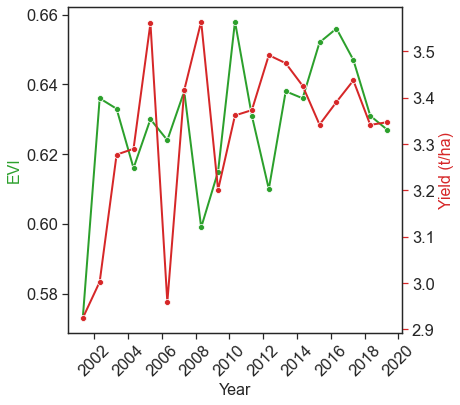

In [97]:
# Use white grid plot background from seaborn
sns.set(font_scale=1.5, style="ticks")

# multiple line plot
font = {'size': 20}

plt.rc('font', **font)

# Create figure and plot space
fig, ax1 = plt.subplots(figsize=(6,6))
plt.xticks(rotation=45)

# Set Axis 1 Parameters
color = 'tab:green'
#ax1.set_title('Annual Yield and EVI', fontsize=25)
ax1.set_xlabel('Year', fontsize=16)
ax1.set_ylabel('EVI', fontsize=16, color=color)
ax1 = sns.lineplot(x='system:time_start', y='EVI', data = df, marker='o', linewidth=2, linestyle='solid',color=color)
ax1.tick_params(axis='y')

# Reduce margins
ax1.margins(x=0)

# Setup 2nd Axis
ax2 = ax1.twinx()

# Set Axis 2 Parameters
color = 'tab:red'
ax2.set_ylabel('Yield (t/ha)', fontsize=16, color=color)
ax2 = sns.lineplot(x='system:time_start', y='Yield', data = df, marker='o', linewidth=2, linestyle='solid', color=color)
ax2.tick_params(axis='y', color=color)

# Define the date format
date_form = DateFormatter("%Y")
ax2.xaxis.set_major_formatter(date_form)

plt.show()


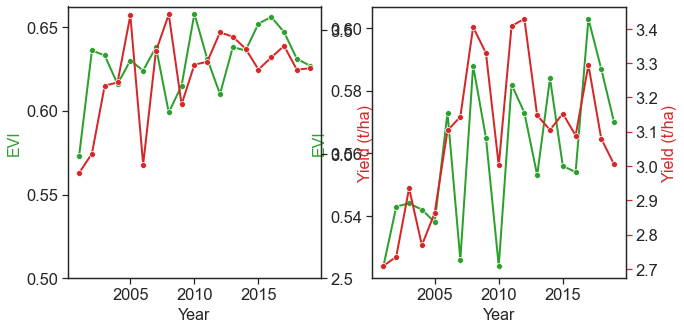

In [18]:
# Use white grid plot background from seaborn
sns.set(font_scale=1.5, style="ticks")

# multiple line plot
font = {'size': 20}

plt.rc('font', **font)

# Create figure and plot space
fig, (ax1, ax3) = plt.subplots(1, 2, figsize=(10,5))

# Set Axis 1 Parameters
color = 'tab:green'
#ax1.set_title('Annual Yield and EVI', fontsize=25)
ax1.set_xlabel('Year', fontsize=16)
ax1.set_ylabel('EVI', fontsize=16, color=color)
sns.lineplot(x='Year', y='EVI', data = df, ax = ax1, marker='o', linewidth=2, linestyle='solid',color=color)
ax1.tick_params(axis='y')
ax1.yaxis.set_ticks(np.arange(0.5, 0.67, 0.05))

# Reduce margins
#ax1.margins(x=0)

# Setup 2nd Axis
ax2 = ax1.twinx()

# Set Axis 2 Parameters
color = 'tab:red'
ax2.set_xlabel('Year', fontsize=16)
ax2.set_ylabel('Yield (t/ha)', fontsize=16, color=color)
sns.lineplot(x='Year', y='Yield', data = df, ax = ax2, marker='o', linewidth=2, linestyle='solid', color=color)
ax2.tick_params(axis='y', color=color)
ax2.yaxis.set_ticks(np.arange(2.5, 4.0, 0.5))

# Set Axis 1 Parameters
color = 'tab:green'
#ax1.set_title('Annual Yield and EVI', fontsize=25)
ax3.set_xlabel('Year', fontsize=16)
ax3.set_ylabel('EVI', fontsize=16, color=color)
sns.lineplot(x='Year', y='EVI', data = df2, ax = ax3, marker='o', linewidth=2, linestyle='solid',color=color)
ax3.tick_params(axis='y')

# Reduce margins
#ax1.margins(x=0)

# Setup 2nd Axis
ax4 = ax3.twinx()

# Set Axis 2 Parameters
color = 'tab:red'
ax4.set_xlabel('Year', fontsize=16)
ax4.set_ylabel('Yield (t/ha)', fontsize=16, color=color)
sns.lineplot(x='Year', y='Yield', data = df2, ax = ax4, marker='o', linewidth=2, linestyle='solid', color=color)
ax4.tick_params(axis='y', color=color)

# Define the date format
#date_form = DateFormatter("%Y")
#ax1.xaxis.set_major_formatter(date_form)

plt.show()


In [117]:
df1 = pd.concat([wet, dataWS], axis=1)
df2 = pd.concat([dry, dataDS], axis=1)
df = pd.concat([df1,df2])
df = df.reset_index(drop='True')
df


,Season,Year,Yield,EVI,system:time_start,ET,PET
0,Wet Season,2001,2.924629,0.573,2001-05-01,22.634,32.073
1,Wet Season,2002,3.002784,0.636,2002-05-01,24.328,35.214
2,Wet Season,2003,3.277125,0.633,2003-05-01,24.465,35.407
3,Wet Season,2004,3.289791,0.616,2004-05-01,26.487,40.072
4,Wet Season,2005,3.560695,0.630,2005-05-01,22.623,34.240
5,Wet Season,2006,2.958856,0.624,2006-05-01,25.947,39.195
6,Wet Season,2007,3.416197,0.638,2007-05-01,23.622,35.948
7,Wet Season,2008,3.564265,0.599,2008-05-01,24.722,32.997
8,Wet Season,2009,3.201172,0.615,2009-05-01,26.813,37.949
9,Wet Season,2010,3.361697,0.658,2010-05-01,21.371,41.350


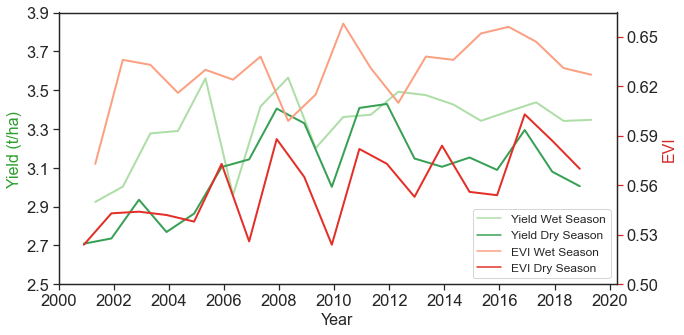

In [185]:
# Use white grid plot background from seaborn
sns.set(font_scale=1.5, style="ticks")

# multiple line plot
font = {'size': 20}

plt.rc('font', **font)

# Create figure and plot space
fig, ax1 = plt.subplots(1, 1, figsize=(10,5))

# Set Axis 1 Parameters
color = 'tab:green'
#ax1.set_title('Annual Yield and EVI', fontsize=25)
ax1.set_xlabel('Year', fontsize=16)
ax1.set_ylabel('Yield (t/ha)', fontsize=16, color=color)
sns.lineplot(x='system:time_start', y='Yield', hue='Season', data = df, ax = ax1, linewidth=2, linestyle='solid', palette='Greens')
ax1.yaxis.set_ticks(np.arange(2.5, 4.0, 0.2))
ax1.tick_params(axis='y')
#ax1.legend(labels=['Yield Wet Season','Yield Dry Season'])
#ax1.get_legend().remove()


# Reduce margins
#ax1.margins(x=0)

# Setup 2nd Axis
ax2 = ax1.twinx()

# Set Axis 2 Parameters
color = 'tab:red'
ax2.set_xlabel('Year', fontsize=16)
ax2.set_ylabel('EVI', fontsize=16, color=color)
sns.lineplot(x='system:time_start', y='EVI', hue= 'Season', data = df, ax = ax2, linewidth=2, linestyle='solid', palette='Reds')
#ax2.legend(labels=['EVI Wet Season','EVI Dry Season'])
ax2.yaxis.set_ticks(np.arange(0.5, 0.67, 0.03))  

# added these three lines
h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()
ax1.legend(h1+h2, ['Yield Wet Season','Yield Dry Season','EVI Wet Season','EVI Dry Season'], loc=4, prop={'size': 12})


ax2.tick_params(axis='y', color=color)
ax2.get_legend().remove()


# Define the date format
#date_form = DateFormatter("%Y")
#ax1.xaxis.set_major_formatter(date_form)

plt.show()


In [177]:
l2

['Wet Season', 'Dry Season']

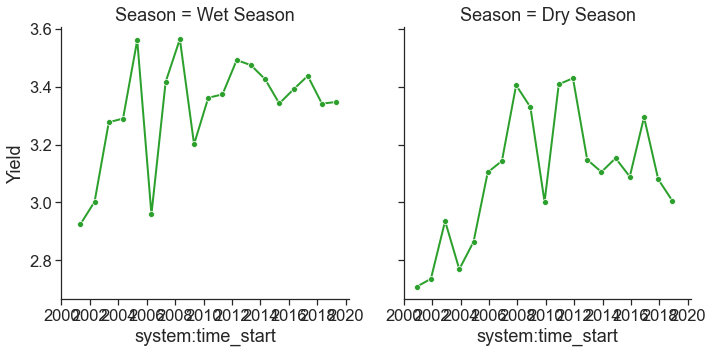

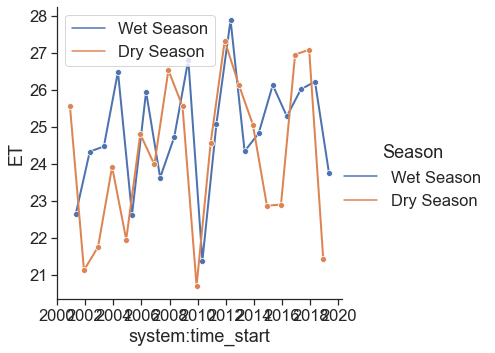

In [51]:
# Use white grid plot background from seaborn
sns.set(font_scale=1.5, style="ticks")

# multiple line plot
font = {'size': 20}

plt.rc('font', **font)

# Create figure and plot space
#fig, ax1 = plt.subplots(1, 1, figsize=(10,5))

# Set Axis 1 Parameters
color = 'tab:green'
#ax1.set_title('Annual Yield and EVI', fontsize=25)
ax1.set_xlabel('Year', fontsize=16)
ax1.set_ylabel('Yield (t/ha)', fontsize=16, color=color)
sns.relplot(x='system:time_start', y='Yield', col='Season', data = df, marker='o', linewidth=2, linestyle='solid',color=color, kind='line')
ax1.tick_params(axis='y', color=color)
#ax1.yaxis.set_ticks(np.arange(0.5, 0.67, 0.03))

# Reduce margins
#ax1.margins(x=0)

# Setup 2nd Axis
ax2 = ax1.twinx()

# Set Axis 2 Parameters
color = 'tab:red'
ax2.set_xlabel('Year', fontsize=16)
ax2.set_ylabel('Evapotranspiration', fontsize=16, color=color)
sns.relplot(x='system:time_start', y='ET', hue= 'Season', data = df, marker='o', linewidth=2, linestyle='solid', color=color, kind='line')
ax2.tick_params(axis='y', color=color)
#ax2.yaxis.set_ticks(np.arange(2.5, 4.0, 0.2))
plt.legend(loc='best')    


# Define the date format
#date_form = DateFormatter("%Y")
#ax1.xaxis.set_major_formatter(date_form)

plt.show()


In [95]:
df_new = df.drop(columns=['ET','PET','Year'])
#df_new

df_final = pd.melt(df_new, id_vars=['system:time_start','Season'], value_vars=['Yield','EVI'])
df_final.head()

AttributeError: 'FacetGrid' object has no attribute 'xaxis'

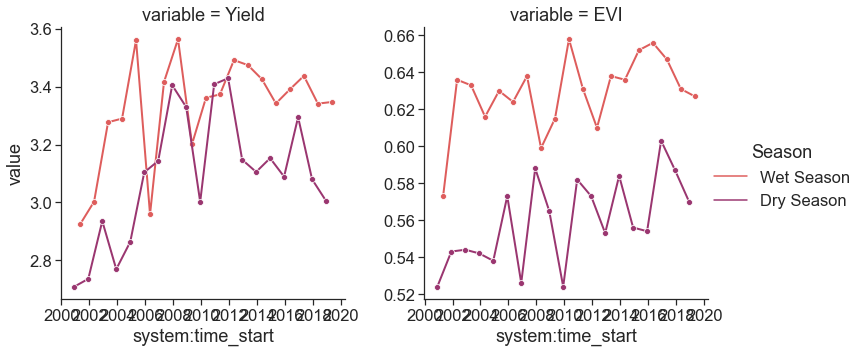

In [103]:
g = sns.relplot(x='system:time_start', 
            y='value', 
            hue='Season', 
            data = df_final, 
            marker='o', 
            col='variable',
            linewidth=2, 
            linestyle='solid', 
            palette='flare', 
            kind='line',
           facet_kws=dict(sharey=False))
g.xaxis

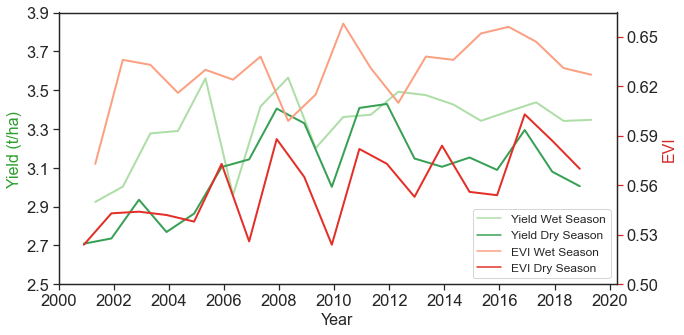

In [189]:
# Use white grid plot background from seaborn
sns.set(font_scale=1.5, style="ticks")

# multiple line plot
font = {'size': 20}

plt.rc('font', **font)

# Create figure and plot space
fig, ax1 = plt.subplots(1, 1, figsize=(10,5))

# Set Axis 1 Parameters
color = 'tab:green'
#ax1.set_title('Annual Yield and EVI', fontsize=25)
ax1.set_xlabel('Year', fontsize=16)
ax1.set_ylabel('Yield (t/ha)', fontsize=16, color=color)
sns.lineplot(x='system:time_start', y='Yield', hue='Season', data = df, ax = ax1, linewidth=2, linestyle='solid', palette='Greens')
ax1.yaxis.set_ticks(np.arange(2.5, 4.0, 0.2))
ax1.tick_params(axis='y')
#ax1.legend(labels=['Yield Wet Season','Yield Dry Season'])
#ax1.get_legend().remove()


# Reduce margins
ax1.margins(x=0)

# Setup 2nd Axis
ax2 = ax1.twinx()

# Set Axis 2 Parameters
color = 'tab:red'
ax2.set_xlabel('Year', fontsize=16)
ax2.set_ylabel('EVI', fontsize=16, color=color)
sns.lineplot(x='system:time_start', y='EVI', hue= 'Season', data = df, ax = ax2, linewidth=2, linestyle='solid', palette='Reds')
#ax2.legend(labels=['EVI Wet Season','EVI Dry Season'])
ax2.yaxis.set_ticks(np.arange(0.5, 0.67, 0.03))  

# added these three lines
h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()
ax1.legend(h1+h2, ['Yield Wet Season','Yield Dry Season','EVI Wet Season','EVI Dry Season'], loc=4, prop={'size': 12})


ax2.tick_params(axis='y', color=color)
ax2.get_legend().remove()


# Define the date format
#date_form = DateFormatter("%Y")
#ax1.xaxis.set_major_formatter(date_form)

plt.show()
